In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [248]:
df_churn = pd.read_csv('Churn.csv')

In [103]:
df_churn

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Начинаем осматривать данные на нахождение не подходящих данных  

## Рассмотрим информацию о данных

In [5]:
df_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Проанализировав показанные данные:
1) Все данные не имеют значение null
2) Колонки с типами "объект" не содержат числовые данные (имеется ввиду, если в колонке должны быть числа, а там оба(текст и числа) эти значения)
3) Мне не нравится значения с плавающей точкой у данных "Credit_Limit" (Кредитный лимит по кредитной карте) и "Avg_Open_To_Buy" (Открытая для покупки кредитная линия) по поиску в интернете я нашел информацию, что кредиты обычно даются и берутся целочисленно


## Проанализируем значения в колонках "Credit_Limit" и "Avg_Open_To_Buy"

Мною была написана функция, позволяющая посмотреть количество уникальных значений в колонке и количество строчек, где применяются эти значения  

In [35]:
def print_float_values(df,column_name):
    """
    Функция дочерняя функции check_float_values
    нужна для вывода информации
    :param df: таблица(DataFrame) для поиска 
    :param column_name: колонка для поиска 
    :return: 
    """
    list_numbers_unique = df[column_name].unique().tolist()
    list_float = []
    try:
        for num in list_numbers_unique:
            if int(num) != num:
                list_float.append(num)
                
    except ValueError as e:
        print(f"Ошибка: {e}")
        return 
    
    df_count_values = df[df[column_name].apply(lambda x: x in list_float)]
    if len(list_float) > 10:
        list_float = f"Количесвтво различных значений - {len(list_float)}"
    print(f"{column_name} количество строчек: {len(df_count_values)} с/т: {round(len(df_count_values)/len(df)*100,1)}% данные: {list_float}")
    return 

def check_float_values(df,column_name = None):
    """
    Функция для нахождения значений чисел с плавающей точкой 
    :param df: таблица (DataFrame), в которой производится выборка
    :param column_name: Колонка для точечной проверки, если не передать - выведет все колонки, в которых есть значение типа float
    
    Выводит количество строчек со всеми значениями "числа с плавающей точкой", соотношение этих строк со всей таблицей и все уникальные данные с этим типом данных
    """
    if column_name is None: 
        df_float = df.select_dtypes(include=['float'])
        for column in df_float.columns:
            print_float_values(df,column)
    else:
        print_float_values(df,column_name)
    print("с/т - соотношение количества строчек со всей таблицей")

Для полного просмотра рассмотрю все колонки с типом числа с плавающей точкой

In [36]:
check_float_values(df_churn)

Credit_Limit количество строчек: 507 с/т: 5.0% данные: [1438.3]
Avg_Open_To_Buy количество строчек: 507 с/т: 5.0% данные: Количесвтво различных значений - 164
Total_Amt_Chng_Q4_Q1 количество строчек: 10115 с/т: 99.9% данные: Количесвтво различных значений - 1156
Total_Ct_Chng_Q4_Q1 количество строчек: 9944 с/т: 98.2% данные: Количесвтво различных значений - 826
Avg_Utilization_Ratio количество строчек: 7657 с/т: 75.6% данные: Количесвтво различных значений - 963
с/т - соотношение количества строчек со всей таблицей


В колонках "Credit_Limit" и "Avg_Open_To_Buy" - не значительное количество уникальных значений, но они используются в 500 строчках, что соизмеримо 5% - оставлю эти значения 

## Посмотрим уникальные значения в колонках с типом "object" (текст)

In [27]:
def unique_objects(df):
    """
    Функция находит уникальные значения в столбцах с текстовым значением  
    :param df: передаем таблицу (DataFrame), в которой будет производится поиск уникальных значений по типу "object"
    
    выводит название колонки и её уникальные значения
    """
    df_objects = df.select_dtypes(include=['object'])
    for column in df_objects.columns:
        print(f"{column}: {df_objects[column].unique()}")


In [37]:
unique_objects(df_churn)

churn: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


Ничего не обычного нет и числовых данных в типе "object" тоже нет, только по началу смущают неизвестные значения ("Unknown"), но они выглядят логично


## Поиск нулевых значений в таблице

In [51]:
def zeroes_finds(df):
    for column_name in df.columns:
        zero_df = df[df[column_name].apply(lambda x: x == 0)]
        if not zero_df.empty:
            print(f"'{column_name}' кол-во строк нулей: {len(zero_df)}")

'Dependent_count' кол-во строк нулей: 904
'Months_Inactive_12_mon' кол-во строк нулей: 29
'Contacts_Count_12_mon' кол-во строк нулей: 399
'Total_Revolving_Bal' кол-во строк нулей: 2470
'Total_Amt_Chng_Q4_Q1' кол-во строк нулей: 5
'Total_Ct_Chng_Q4_Q1' кол-во строк нулей: 7
'Avg_Utilization_Ratio' кол-во строк нулей: 2470


Рассмотрим по порядку
1) "Dependent_count" (число иждивенцев) у 904 клиентов нет детей - нормально
2) "Months_Inactive_12_mon" (месяцы бездействия) 29 клиентов были активными пользователями - нормально
3) "Contacts_Count_12_mon" (кол-во контактов) 399 клиентов не контактировали с банком за последние 12 месяце - нормально
4) "Total_Revolving_Bal" (оборотный остаток на "кредитке") у 2470 нет оборотного остатка на кредитной карте - люди не использующие карту это мы узнаем далее 
5) "Total_Amt_Chng_Q4_Q1" (Изменение суммы сделки) у 5 не изменилась сумма сделки - нормально
6) "Total_Ct_Chng_Q4_Q1" (Изменение количества транзакций) у 7 не изменилось - нормально
7) "Avg_Utilization_Ratio" (Средний Коэффициент Использования Карт) 2470 человек не использовали карту - довольно странная колонка, я думаю, что ушедшие не используют карту

Все пункты кроме 7, являются нормальными

### Проверяем людей, которые не используют карту, с целью узнать к какой группе они относятся 

In [55]:
df_churn[df_churn["Avg_Utilization_Ratio"].apply(lambda x: x == 0)].groupby(['churn'])['Avg_Utilization_Ratio'].count()

churn
Attrited Customer     893
Existing Customer    1577
Name: Avg_Utilization_Ratio, dtype: int64

Вывод карту не используют больше люди, которые не ушли из банка 

## Проверяем на дубликаты

In [56]:
print(f"Количетво дубликатов: {df_churn.duplicated().sum()}")

Количетво дубликатов: 0


В данных отсутствуют одинаковые значения

## Нахождение выбросов

In [57]:
df_num = df_churn.select_dtypes(exclude=['object']) # выбираем только числовые значения

Будем пользоваться методом интерквартильного расстояния

In [85]:
outlier_cols = []

for column in df_num.columns:
    Q1 = df_num[column].quantile(0.25)
    Q3 = df_num[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_num[column] < Q1 - 1.5 * IQR) | (df_num[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Колонки с выбросами:", outlier_cols)

Колонки с выбросами: ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


На выходе мы получили колонки, у которых есть выбросы, покажем эти данные

### Визуализация выбросов

Напишем простенькую функцию, которая покажет все графики, по 5 в строчке

In [83]:
def box_plot(df):
    """
    Функция рисует графики выбросов по 5 в строчке 
    :param df: на вход подается таблица (DataFrame) с выделенными колонками для поиска, если на вход подали колонку таблицы, то она выведется одна
    :return: рисует графики "box_plot"
    """
    if type(df) is type(pd.Series({1: "1"})):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
        sns.boxplot(x=df, color="purple")
        plt.tight_layout()
        plt.show()
    else:
        list_col = df.columns
        count = 1
        while True:
            if count * 5 > len(list_col):
                small_df = df[list_col[(count-1)*5:len(list_col)]]
            else:
                small_df = df[list_col[(count-1)*5:count*5]]
                
            fig, axes = plt.subplots(nrows=1, ncols=len(small_df.columns), figsize=(10, 5))

            for i, column in enumerate(small_df.columns):
                sns.boxplot(x=small_df[column], ax=axes[i], color="purple")
                axes[i].set_title(column,  fontsize=10)
                
            if count * 5 >= len(list_col):
                break
            count += 1
            plt.tight_layout()
            plt.show()

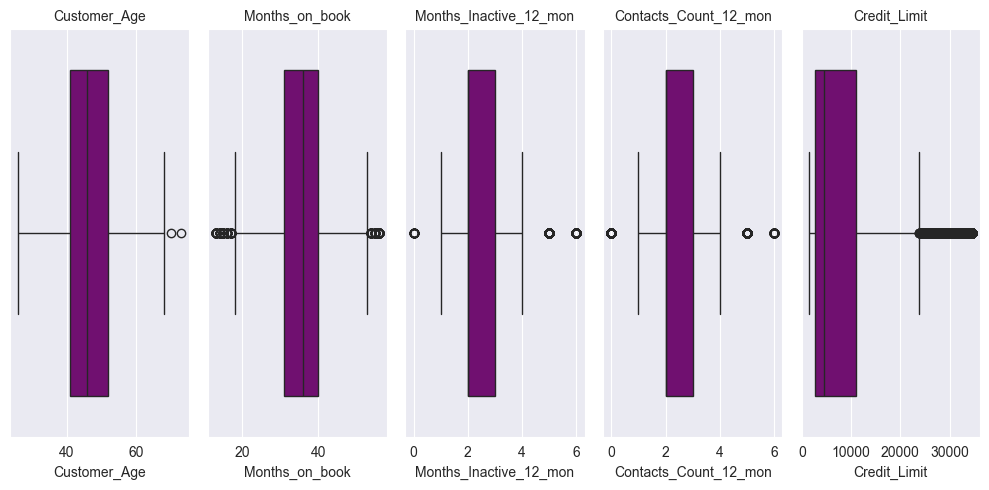

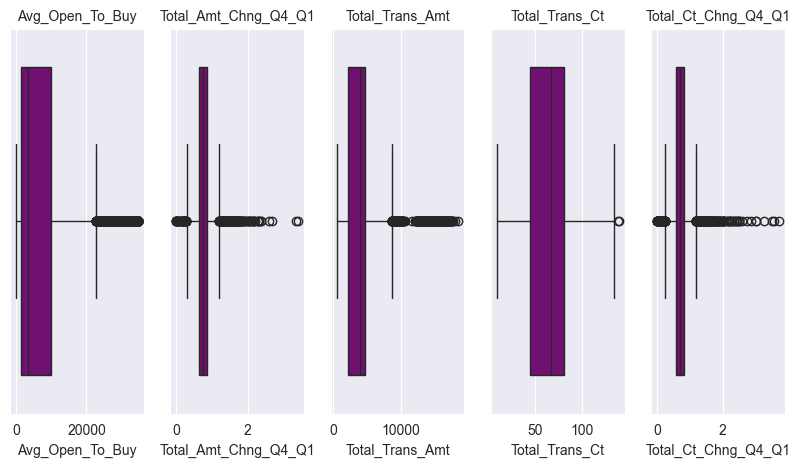

In [84]:
box_plot(df_num[outlier_cols])

Разберем каждый график
1) "Customer_Age" (возраст клиента) выброс возраста не выглядит космическим - оставляем
2) "Months_on_book" (Период взаимоотношений с банком) большое количество выбросов с двух сторон это говорит о том, что это нормально, тем более их значение не находятся в бесконечности
3) "Months_Inactive_12_mon" (Количество месяцев бездействия) точки довольно толстые - значений много, 6 месяцев без действия допустимое отклонение
4) "Contacts_Count_12_mon" (Количество контактов) данные выглядят аналогично с прошлым пунктом
5) "Credit_Limit" (Кредитный лимит) много значений и нет выбивающихся из диапазона - нормально
6) "Avg_Open_To_Buy" (Открытая для покупки кредитная линия) схожа с графиком "Credit_Limit"
7) "Total_Amt_Chng_Q4_Q1" (Изменение суммы сделки) есть выбивающиеся значения, но по графику они не превышают значения "3"
8) "Total_Trans_Amt" (Общая сумма сделки) много значений - выбросов, расположенных рядом 
9) "Total_Trans_Ct" (Общее количество транзакций) - выбиваются парочку значений, но они близко к верхней границе - нормально
10) "Total_Ct_Chng_Q4_Q1" (Изменение количества транзакций) - все хорошо

Все выбросы показанные выше представленным методом, оказались нормальными данными

Пронанализировав данные, мы ничего не удалили 

# Расматриваем графики с главной метрикой (churn)

In [101]:
def heatmap_corr(df_main):
    """
    Показывает влияние всех данных друг на друга, то есть корреляцию
    Функция кодирует данные внутри себя  
    :param df_main: таблица (DataFrame)
    :return: Показывает график корреляции 
    """
    from sklearn.preprocessing import OrdinalEncoder
    df = df_main.copy()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    ordinal_encoder = OrdinalEncoder()
    encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
    df[categorical_columns] = encoded_data.astype(int)
    plt.figure(figsize = (20,5))  
    sns.heatmap(df.corr(),annot=True,color = "purple")

Выведем график соотношения данных.
Будем смотреть графики с колонкой "churn" (состояние клиента) с данными влияющими наибольше всего 

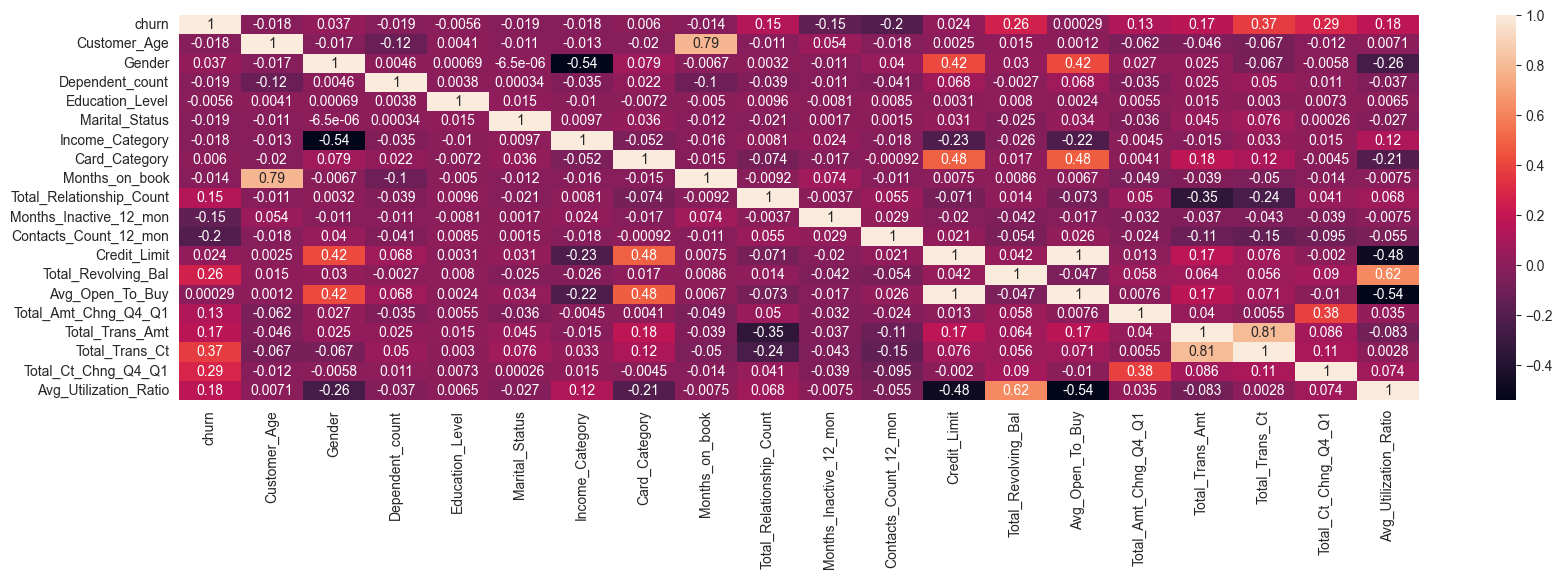

In [102]:
heatmap_corr(df_churn)

Болшее влияние на "Churn" оказывают:
1) "Total_Relationship_Count"
2) "Months_Inactive_12_mon"
3) "Contacts_Count_12_mon"
4) "Total_Revolving_Bal"
5) "Total_Amt_Chng_Q4_Q1"
6) "Total_Trans_Amt"
7) "Total_Trans_Ct"
8) "Total_Ct_Chng_Q4_Q1"
9) "Avg_Utilization_Ratio"

## График churn (состояние клиента) и Total_Relationship_Count (Общее количество продуктов)

In [111]:
def mean_graphic(df,x_inp,y_inp): # ввод df и наименование колонок поиска и группировки
    """
    Функция показывает график по заданным колонкам, среднее значение
    :param df: таблица(DataFrame)
    :param x_inp: Название колонки для оси x
    :param y_inp: Название колонки для оси y
    :return: Показывает построенный график
    """
    group_df = df.groupby(x_inp)[y_inp].mean().reset_index()
    plt.figure(figsize=(4, 4))
    sns.barplot(x=x_inp, y=y_inp, data=group_df,color = "purple")
    plt.xlabel(x_inp)
    plt.ylabel(y_inp)
    plt.xticks(rotation=90)
    
    plt.show()

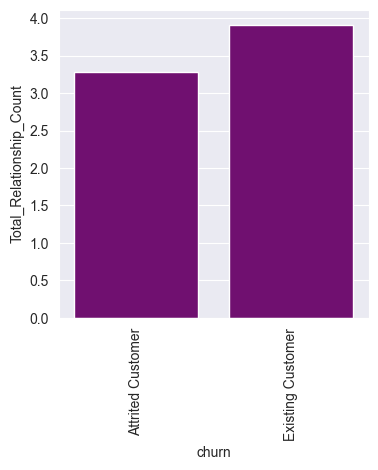

In [118]:
mean_graphic(df_churn,"churn","Total_Relationship_Count")

Больше продуктов у текущих клиентов, то есть чем больше продуктов тем меньше шанс, что клиент уйдет 

## График churn (состояние клиента) и Months_Inactive_12_mon (Количество месяцев бездействия)

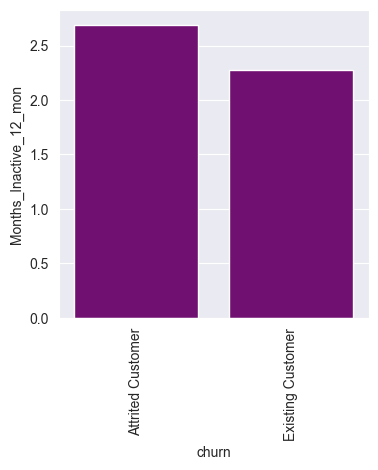

In [119]:
mean_graphic(df_churn,"churn","Months_Inactive_12_mon")

Ушедшие клиенты больше бездействуют, что логично!

## График churn (состояние клиента) и Contacts_Count_12_mon (Количество контактов)

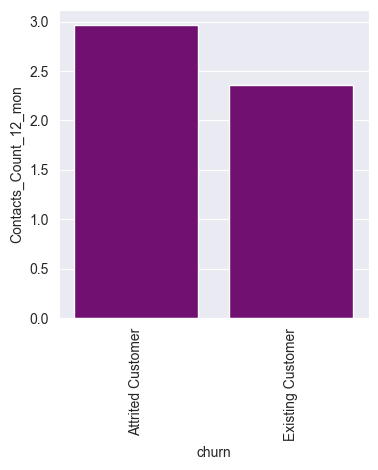

In [120]:
mean_graphic(df_churn,"churn","Contacts_Count_12_mon")

Ушедшие клиенты больше совершали контактов с банком, думаю для того, чтобы закрыть "продукты" и уйти из банка, поэтому у них меньше "продуктов" в банке  

## График churn (состояние клиента) и Total_Revolving_Bal (оборотный остаток на кредитной карте)

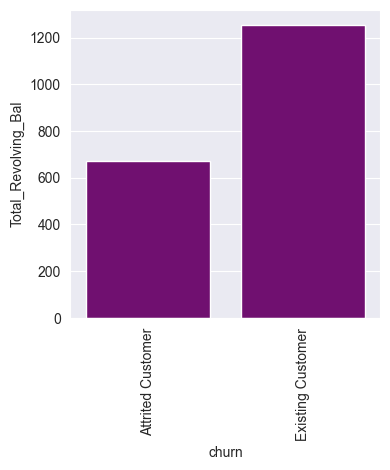

In [121]:
mean_graphic(df_churn,"churn","Total_Revolving_Bal")

Остаток на кредитной карте выглядит логично, у текущих клиентов он больше

## График churn (состояние клиента) и Total_Amt_Chng_Q4_Q1 (Изменение суммы сделки)

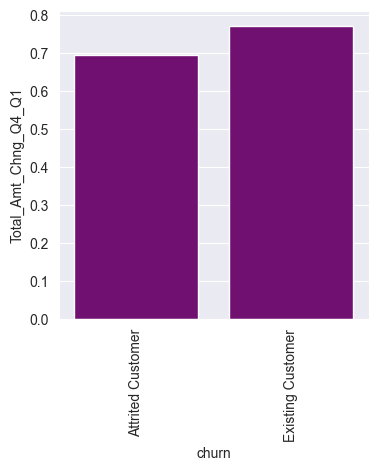

In [127]:
mean_graphic(df_churn,"churn","Total_Amt_Chng_Q4_Q1")

Меньше всего изменяются ушедшие, так как в меньшей степени пользуются услугами банка

## График churn (состояние клиента) и Total_Trans_Amt (Общая сумма сделки)

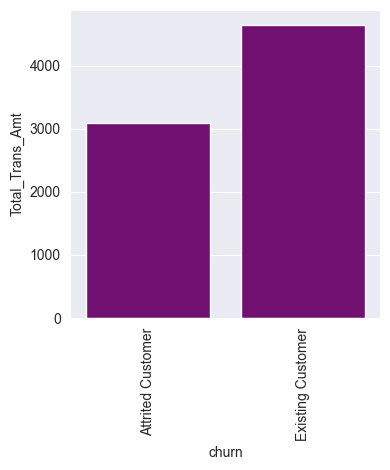

In [123]:
mean_graphic(df_churn,"churn","Total_Trans_Amt")

Текущие клиенты продолжают пользоваться кредиткой, в отличии от ушедших

## График churn (состояние клиента) и Total_Trans_Ct (Общее количество транзакций)

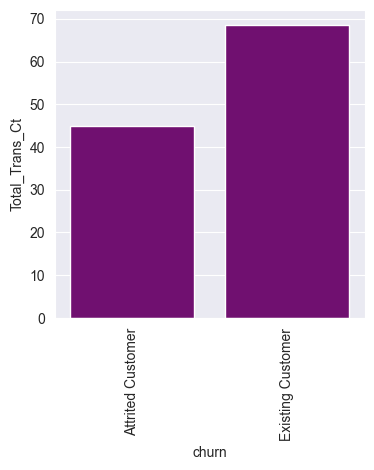

In [124]:
mean_graphic(df_churn,"churn","Total_Trans_Ct")

Ушедшие пользуются услугами другого банка - меньше нужны транзакции 

## График churn (состояние клиента) и Total_Ct_Chng_Q4_Q1 (Изменение количества транзакций)

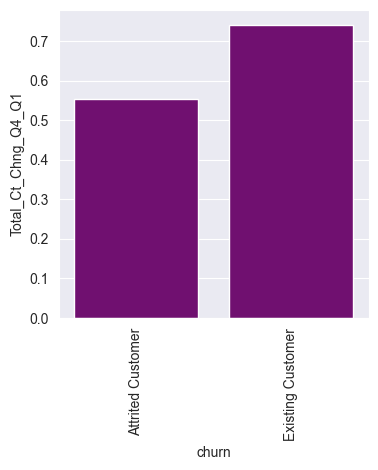

In [125]:
mean_graphic(df_churn,"churn","Total_Ct_Chng_Q4_Q1")

На графике наблюдаем что у ушедших уменьшилось количество транзакций по сравнению с первым кварталом

## График churn (состояние клиента) и Avg_Utilization_Ratio (Средний Коэффициент Использования Карт)

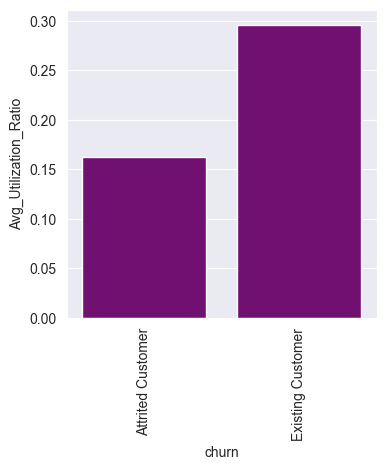

In [126]:
mean_graphic(df_churn,"churn","Avg_Utilization_Ratio")

Ушедшие клиенты перестали пользоваться продуктами банка, перешли к другому - меньше используют карту

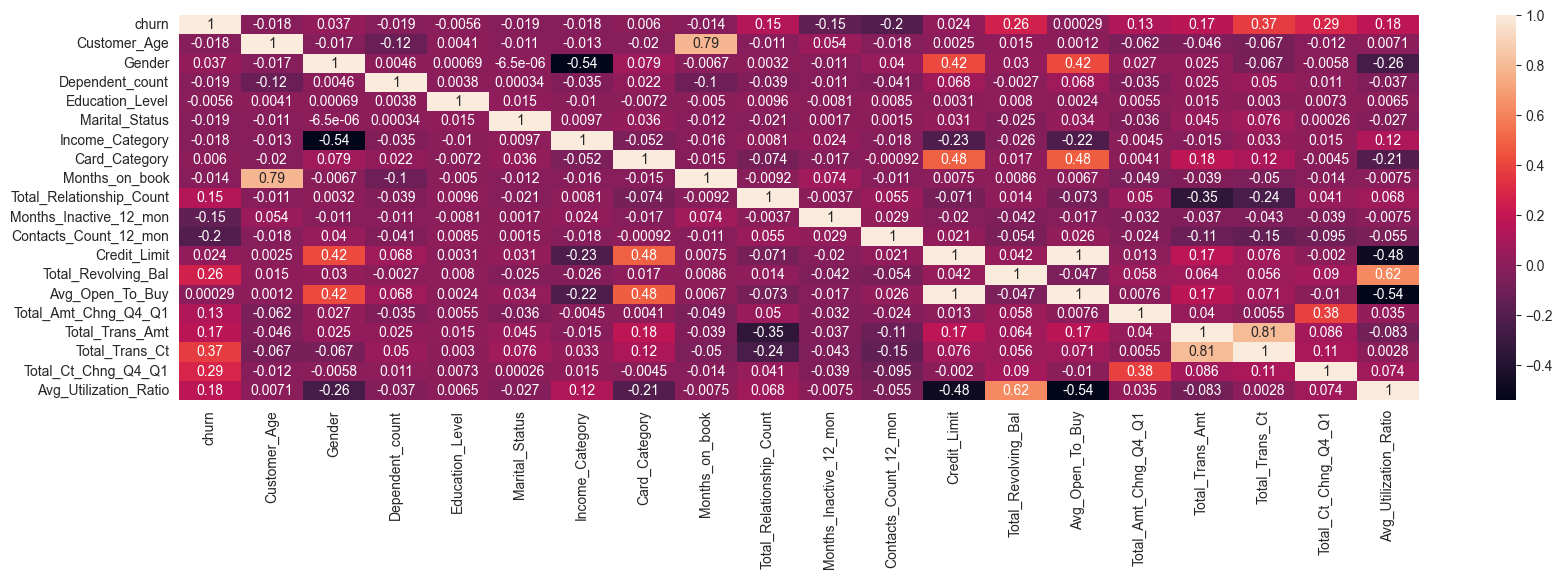

In [160]:
heatmap_corr(df_churn)

Вывод: очень хорошие данные - все находятся в допустимом диапазоне. Отношение колонки "Churn" с данными - правильное

# Кодирование данных и Классификация

## Кодирование

### Кодируем данные с помощью OrdinalEncoder

In [251]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df_churn.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df_churn[categorical_columns])
df_churn[categorical_columns] = encoded_data.astype(int)

In [252]:
df_churn.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Разбиваем данные на тренировку и тестирование

Но в начале разделяем ответы и остальную таблицу 

In [253]:
X = df_churn.drop(columns='churn')
y = df_churn.churn

Вот теперь разбиваем данные 80%/20%

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Масштабируем данные

In [259]:
df_copy = df_churn.copy()
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  Классификация

In [167]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

### Классификатор KNC

Идем копируем с интернета, нахождения лучшего количества соседей 

Text(0, 0.5, 'F1 Score')

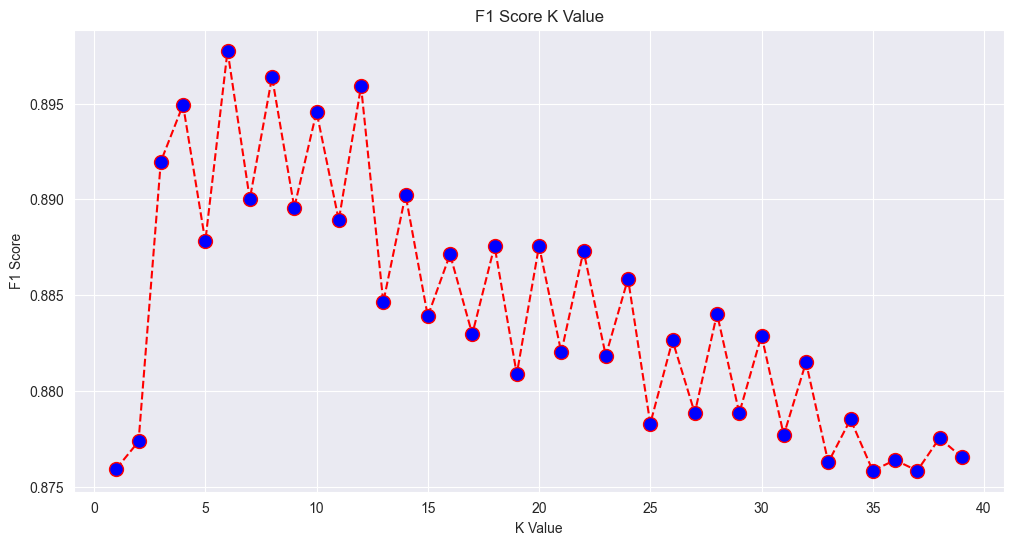

In [214]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

смотрим эфектно на графике

In [219]:
f1s.index(max(f1s))

5

Находим индекс, при котором высший результат, он равен 5, но это индекс, по этому прибавляем 1 и ответ 6 - гениально

              precision    recall  f1-score   support

           0       0.81      0.48      0.61       327
           1       0.91      0.98      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.86      0.73      0.77      2026
weighted avg       0.89      0.90      0.89      2026



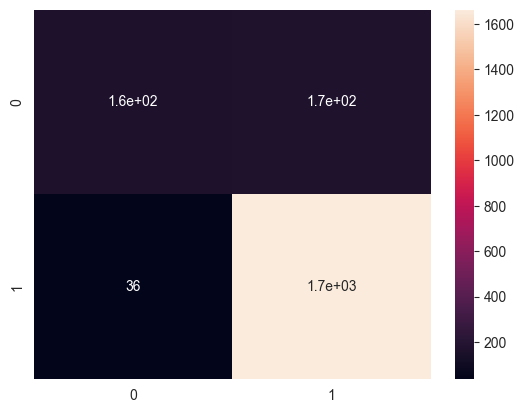

In [218]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_true = y_test
y_pred = classifier.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
print(classification_report(y_test, y_pred))

Запоминаем оценки и переходим к следующему классификатору

### Класификатор опорных векторов

In [236]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)
y_true = y_test
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.53      0.63       327
           1       0.91      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



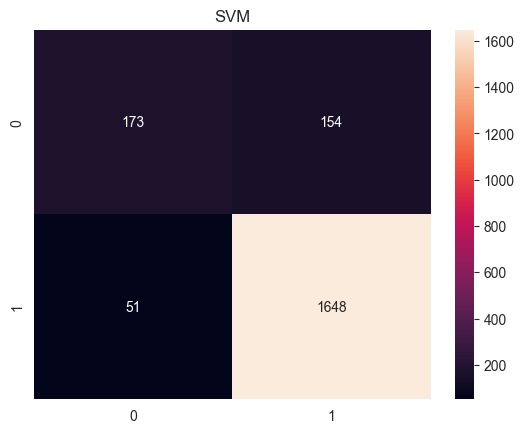

In [238]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('SVM')

print(classification_report(y_test,y_pred))

Угу, тот же ответ запоминаем!

### Классификатор Naive Bayes 

Для него нужны не отрицательные значения, поэтому он был запущен без масштаба данных

              precision    recall  f1-score   support

           0       0.21      0.42      0.28       327
           1       0.86      0.71      0.78      1699

    accuracy                           0.66      2026
   macro avg       0.54      0.56      0.53      2026
weighted avg       0.76      0.66      0.70      2026



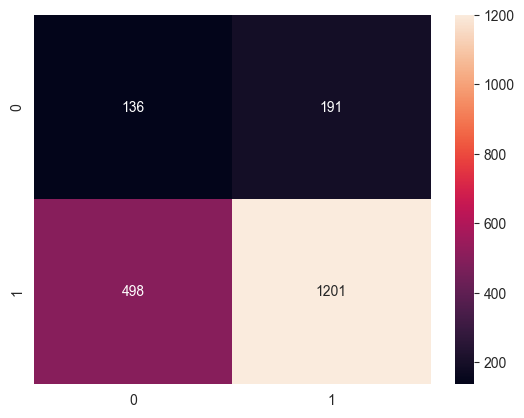

In [258]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test,y_pred))

## Классификационный вывод

Попробовав коснуться простые, наверное, классификаторы, делаю выводы. Лучший из проанализированных был классификатор опорных векторов(Support Vector Machines) (смотрелось по f1-score - что-то среднее)